# Welcome to Colab!

## Access popular AI models via Google-Colab-AI Without an API Key
All users have access to most popular LLMs via the `google-colab-ai` Python library, and paid users have access to a wider selection of models. For more details, refer to the [getting started with google colab ai](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb).



In [6]:
#Student Marks Prediction using Logistic Regression

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('StudentsPerformance.xlsx')
print(data)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [8]:
#print first 10 rows
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [9]:
#print last 10 rows
data.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [10]:
#Check total no of col and rows using shape
data.shape

(1000, 8)

In [11]:
#stats
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
#Create a new column for the rounded average of the three scores and display the first 10 rows.
data["mean score"] = ((data["math score"] + data["reading score"] + data["writing score"]) / 3).round()
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0
5,female,group B,associate's degree,standard,none,71,83,78,77.0
6,female,group B,some college,standard,completed,88,95,92,92.0
7,male,group B,some college,free/reduced,none,40,43,39,41.0
8,male,group D,high school,free/reduced,completed,64,64,67,65.0
9,female,group B,high school,free/reduced,none,38,60,50,49.0


In [13]:
#check how many females and males
data['gender'].value_counts()

,count
gender,
female,518
male,482


In [14]:
#Student Marks Prediction-Label Encoding Step

#1: Import necessary library
from sklearn.preprocessing import LabelEncoder

#2: Create a LabelEncoder object
encoder = LabelEncoder()

#3: Convert text columns into numeric values
data['gender'] = encoder.fit_transform(data['gender'])
data['race/ethnicity'] = encoder.fit_transform(data['race/ethnicity'])
data['parental level of education'] = encoder.fit_transform(data['parental level of education'])
data['lunch'] = encoder.fit_transform(data['lunch'])
data['test preparation course'] = encoder.fit_transform(data['test preparation course'])

#4: Show first 10 rows after encoding
data.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0
5,0,1,0,1,1,71,83,78,77.0
6,0,1,4,1,0,88,95,92,92.0
7,1,1,4,0,1,40,43,39,41.0
8,1,3,2,0,0,64,64,67,65.0
9,0,1,2,0,1,38,60,50,49.0


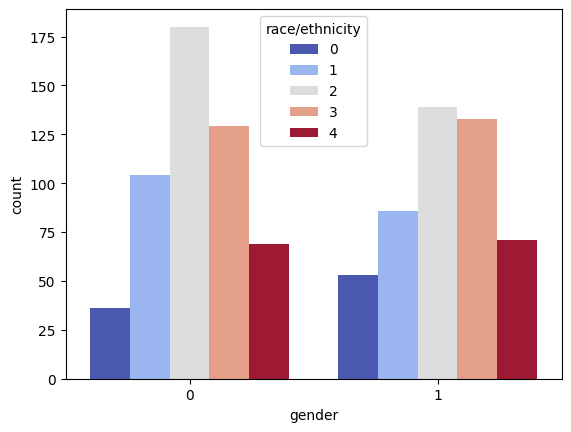

In [15]:
#Analysis Gender & Race
import seaborn as sns
sns.countplot(x='gender', data=data, hue='race/ethnicity', palette='coolwarm' )
plt.show()
#0 means female
#1 means male

In [16]:
#mostly females belongs to group C
#mostly males belongs to group D
#Analysing Test Preparation Course
data['test preparation course'].value_counts()
# 1 means None
# 0 means Completed

,count
test preparation course,
1,642
0,358


([<matplotlib.patches.Wedge at 0x7c267cb24da0>,
 [Text(-0.4746018502673304, 0.9923472596439347, 'None'),
  Text(0.47460146383300333, -0.9923474444606438, 'Completed')])

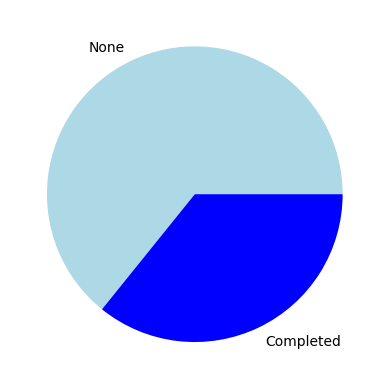

In [17]:
#Pie chart of analysing Test Preparation Course
labels = ['None', 'Completed']
colors = ['lightblue', 'blue']
plt.pie(data['test preparation course'].value_counts() , labels = labels, colors = colors)

In [18]:
#Students have done the course means 0 they are scoring good scores
#Students have not done the course means 1 they are scoring less scores

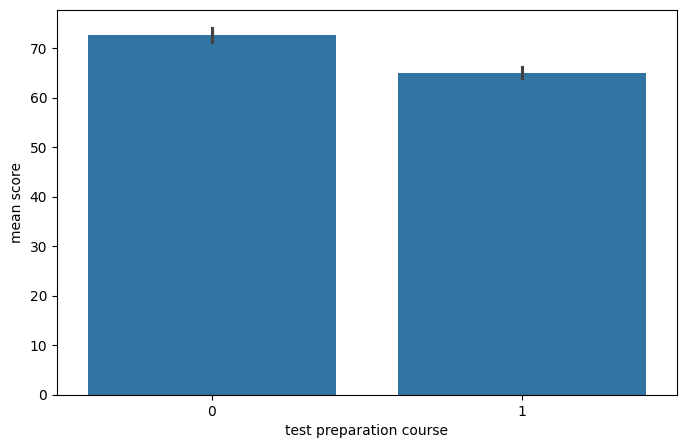

In [19]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'test preparation course', y = 'mean score', data=data)
plt.show()

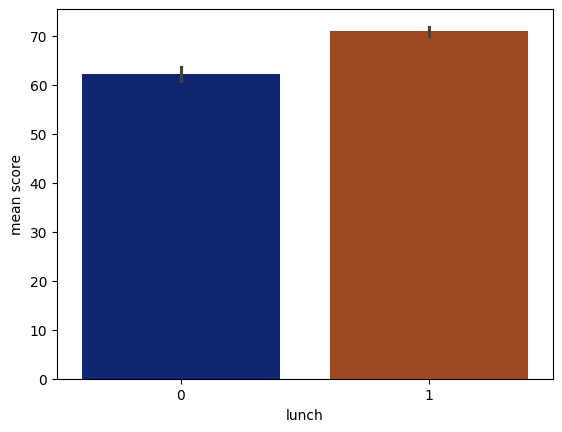

In [20]:
sns.barplot(x='lunch', y='mean score', hue='lunch', data=data, palette='dark', legend= False)
plt.show()
#0 free lunch from government
#1 bringing own lunch

In [21]:
#Those students mean score is more who bringing own lunch rather than the those students with free/reduced lunch

<Axes: xlabel='parental level of education', ylabel='mean score'>

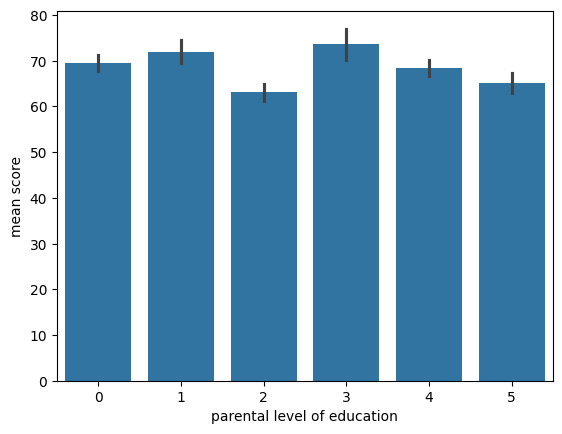

In [22]:
#Analysing parental level of education
sns.barplot(x = 'parental level of education', y = 'mean score', data = data)

In [23]:
#3rd category students performing in good marks beacuse their parents have masters degree
#2nd Category of Parental Education belongs to High School and 3rd Category belongs to Master Degree

<Figure size 1200x600 with 0 Axes>

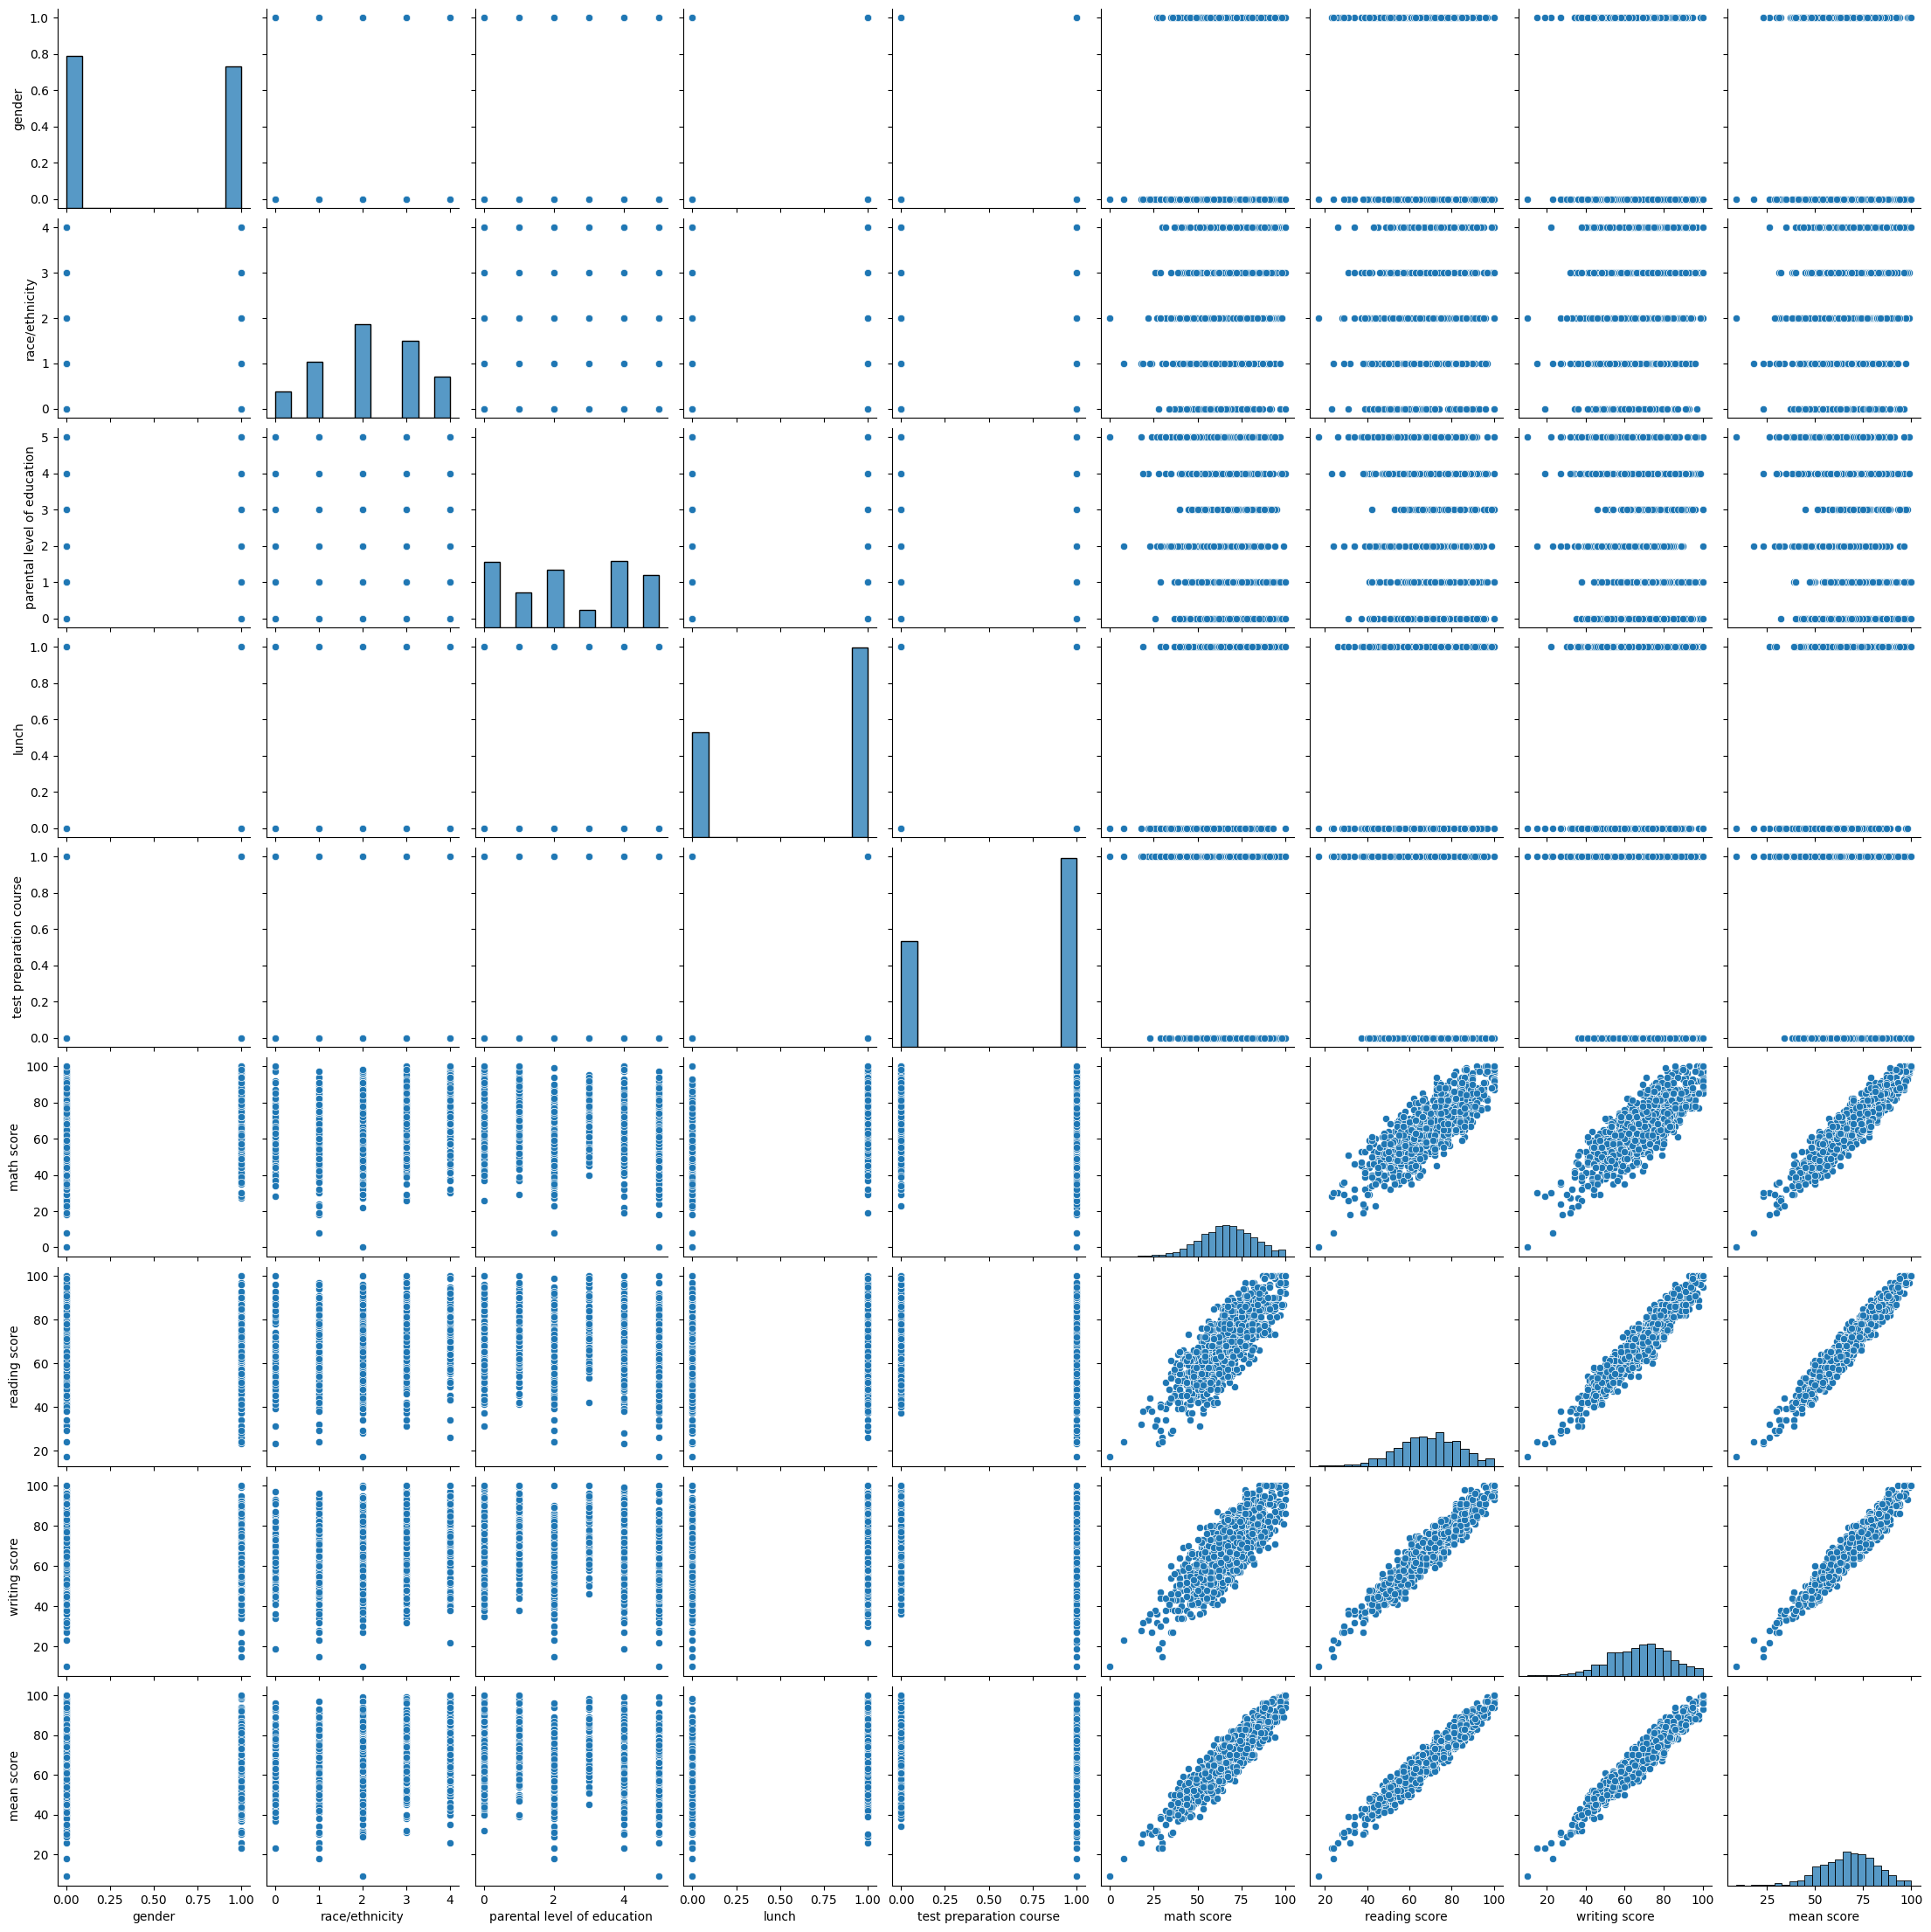

In [24]:
#this is pair plot for my data , in this check relationship of each col with each other
plt.figure(figsize = (12,6))
sns.pairplot(data)
plt.show()

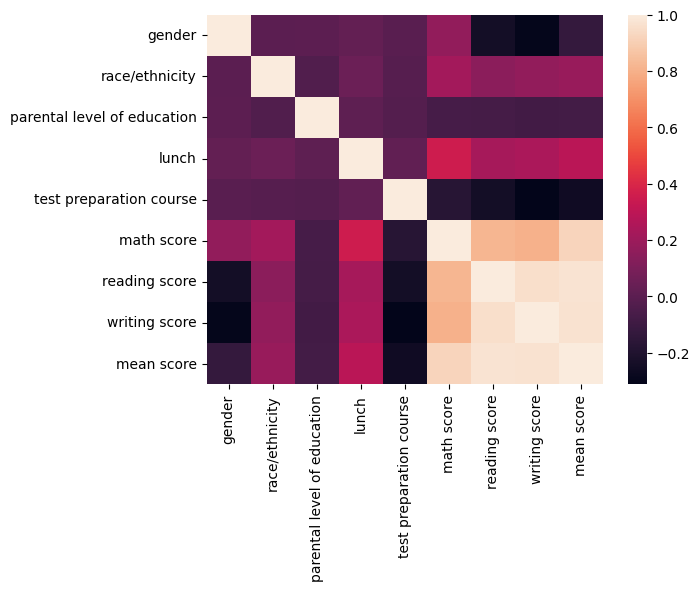

In [25]:
# Heatmap to check correlation between different columns
# Correlation tells how strongly two things are related (from -1 to +1)
# +1 = strong positive relation (both increase together)
# -1 = strong negative relation (one increases, the other decreases)
# 0 = no relation
sns.heatmap(data.corr())   # creates a colorful grid showing relationships between numeric columns
plt.show()                 # displays the heatmap


In [26]:
#Data Preprocessing
#In this droping math , writing and reading score beacuse main target class is mean score
df = data.drop(['math score', 'writing score', 'reading score'],axis = 1)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [27]:
# Import function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# y = target column we want to predict (mean score)
y = df['mean score']

# x = all other columns used to make predictions (input features)
x = df.drop(['mean score'], axis=1)

# Split the data into training and testing sets
# 80% data for training, 20% for testing
# random_state=0 ensures we get the same random split every time we run the code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [28]:
# Import Logistic Regression model for classification
from sklearn.linear_model import LogisticRegression

# Import tools to evaluate model performance
# classification_report -> shows accuracy, precision, recall, etc.
# confusion_matrix -> shows correct vs wrong predictions
from sklearn.metrics import classification_report, confusion_matrix


In [29]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [30]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [31]:
predictions = model.predict(x_test)
predictions

array([69., 56., 56., 59., 73., 76., 67., 71., 76., 69., 73., 54., 69.,
       71., 76., 54., 68., 74., 62., 49., 73., 69., 67., 68., 71., 56.,
       55., 68., 54., 74., 59., 76., 67., 73., 76., 71., 74., 68., 92.,
       69., 73., 56., 68., 75., 65., 92., 73., 65., 74., 54., 71., 55.,
       65., 68., 71., 69., 69., 69., 76., 69., 71., 74., 76., 71., 73.,
       58., 69., 73., 76., 68., 71., 71., 71., 75., 71., 71., 69., 69.,
       73., 73., 76., 69., 87., 73., 79., 69., 71., 92., 76., 54., 54.,
       73., 54., 55., 69., 68., 59., 54., 56., 68., 76., 71., 61., 50.,
       71., 75., 76., 65., 69., 79., 74., 75., 69., 59., 74., 74., 76.,
       59., 56., 76., 69., 65., 74., 68., 71., 76., 73., 76., 76., 74.,
       79., 73., 59., 69., 76., 69., 71., 69., 69., 73., 71., 73., 73.,
       68., 65., 59., 59., 59., 76., 69., 68., 74., 74., 71., 74., 69.,
       71., 73., 69., 68., 74., 69., 59., 71., 76., 73., 76., 68., 69.,
       73., 69., 71., 65., 75., 73., 69., 69., 73., 87., 73., 68

In [32]:
y_test

,mean score
993,69.0
859,77.0
298,45.0
553,68.0
672,74.0
...,...
679,61.0
722,84.0
215,81.0
653,70.0


In [33]:
difference = abs(predictions - y_test)

In [34]:
difference.mean()

np.float64(11.03)

In [ ]:
from google.colab import files
uploaded = files.upload()

